FACTORS IN DATASET AND THEIR IMPORTANCE
1. Debt to Equity Ratio
2. ROI
3. ROE
4. ROA
5. Net Income
6. Revenue
7. Current Ratio
8. Gross Margin
9. Free Cash Flow

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Import BeautifulSoup
from bs4 import BeautifulSoup

In [3]:
#Scraping Data Data
page = requests.get("https://ycharts.com/companies/AAPL/net_income_ttm")
page

page2 = requests.get("https://ycharts.com/companies/AAPL/gross_profit_margin")
page2

page3 = requests.get("https://ycharts.com/companies/AAPL/free_cash_flow")
page3

<Response [200]>

In [4]:
#Website Structure
soup = BeautifulSoup(page.content)
soup2 = BeautifulSoup(page2.content)
soup3 = BeautifulSoup(page3.content)

In [5]:
#Left DataTable and Right DataTable
My_table = soup.find('table',{'class':'histDataTable'})
My_table_right = soup.find('div',{'class':'dataColRt'})

In [6]:
#index array 
index = [0]*50
for i in range(50):
    index[i] = i

for i in range(len(index)):
    index[i] += 1

index = pd.DataFrame(index)
index.columns = ['index']
index

,index
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [7]:
#2006-2019 Quarter Dates List
dates = []
for tag in My_table.select(".col1 "):
  text = tag.get_text()
  dates.append(text)
dates = dates[1:]
dates = pd.Series(dates)

dates2 =[]
for tag in My_table_right.select(".col1 "):
  text = tag.get_text()
  dates2.append(text)
dates2 = dates2[1:]
dates2 = pd.Series(dates2)

quarters = dates.append(dates2)
quarters = pd.DataFrame(quarters)
quarters.index = range(50)
quarters.columns = ['Date']
quarters

,Date
0,"March 31, 2019"
1,"Dec. 31, 2018"
2,"Sept. 30, 2018"
3,"June 30, 2018"
4,"March 31, 2018"
5,"Dec. 31, 2017"
6,"Sept. 30, 2017"
7,"June 30, 2017"
8,"March 31, 2017"
9,"Dec. 31, 2016"


In [8]:
#2006-2019 Quarter NI list
NI = []
for tag in My_table.select(".col2 "):
  text = tag.get_text()
  NI.append(text)
NI = NI[1:]
NI = pd.Series(NI)
NI = NI.str.strip(" ")
NI = NI.str.strip("\n")
NI = NI.str.strip(" ")
NI = NI.str.strip("\n")
NI = NI.str.strip(" ")
NI = NI.str.strip("B")

NI2 =[]
for tag in My_table_right.select(".col2 "):
  text = tag.get_text()
  NI2.append(text)
NI2 = NI2[1:]
NI2 = pd.Series(NI2)
NI2 = NI2.str.strip(" ")
NI2 = NI2.str.strip("\n")
NI2 = NI2.str.strip(" ")
NI2 = NI2.str.strip("\n")
NI2 = NI2.str.strip(" ")
NI2 = NI2.str.strip("B")

NIFinal = NI.append(NI2)
NIFinal = pd.DataFrame(NIFinal)
NIFinal.index = range(50)
NIFinal.columns = ['Net Income']
NIFinal

,Net Income
0,57.17
1,59.43
2,59.53
3,56.12
4,53.32
5,50.52
6,48.35
7,46.65
8,45.73
9,45.22


In [9]:
#2006-2019 revenue list
revenue = pd.read_csv("applerev.csv")
revenue = revenue['revenue'].dropna()
revenue = pd.DataFrame(revenue)
revenue.index = range(50)
revenue.columns = ['Gross Revenue']
revenue

,Gross Revenue
0,58015.0
1,62900.0
2,53265.0
3,61137.0
4,84310.0
5,52579.0
6,45408.0
7,52896.0
8,88293.0
9,46852.0


In [10]:
#2006-2019 stock open price
stockprice = pd.read_csv("appledata2.csv")
stockprice = stockprice['Stock Price']
stockprice = stockprice.dropna()
stockprice = pd.DataFrame(stockprice)
stockprice.index = range(50)
stockprice.columns = ['Stock Price']
stockprice

,Stock Price
0,189.95
1,157.07
2,223.99
3,183.03
4,165.26
5,166.02
6,150.65
7,140.21
8,139.29
9,111.82


In [11]:
#2006-2019 p/e ratio
peratio = pd.read_csv("appledata2.csv")
peratio = peratio['PE Ratio']
peratio = peratio.dropna()
peratio = pd.DataFrame(peratio)
peratio.index = range(50)
peratio.columns = ['P/E Ratio']
peratio

,P/E Ratio
0,15.98
1,12.92
2,18.87
3,16.59
4,15.95
5,17.06
6,16.38
7,15.93
8,16.29
9,13.39


In [12]:
#2006-2019 return on equity
roe = pd.read_csv("appledata3.csv")
roe = roe['Return on Equity']
roe = roe.dropna()
roe = pd.DataFrame(roe)
roe.index = range(50)
roe.columns = ['Return_On_Equity']
roe = roe['Return_On_Equity'].str.rstrip('%')
roe

0     51.29
1     50.92
2     48.68
3     43.50
4     39.97
5     37.37
6     36.29
7     35.40
8     35.09
9     34.94
10    35.59
11    37.89
12    40.24
13    42.79
14    42.94
15    41.46
16    39.44
17    37.36
18    32.76
19    31.20
20    30.36
21    28.93
22    29.06
23    29.93
24    32.20
25    36.32
26    39.51
27    42.14
28    45.63
29    44.35
30    39.56
31    40.48
32    37.77
33    35.99
34    33.76
35    32.66
36    32.60
37    31.83
38    31.45
39    34.06
40    33.06
41    32.78
42    31.88
43    26.67
44    27.69
45    28.57
46    27.19
47    26.74
48    26.05
49    24.76
Name: Return_On_Equity, dtype: object

In [13]:
#2006-2019 return on investment
roi = pd.read_csv("appledata4.csv")
roi = roi['Return on Investment']
roi = roi.dropna()
roi = pd.DataFrame(roi)
roi.index = range(50)
roi.columns = ['Return_On_Investment']
roi = roi['Return_On_Investment'].str.rstrip('%')
roi

0     31.95
1     31.91
2     32.03
3     29.66
4     28.54
5     28.05
6     27.94
7     28.21
8     28.81
9     29.42
10    30.76
11    33.56
12    36.78
13    40.87
14    42.48
15    42.45
16    41.58
17    40.64
18    36.57
19    35.78
20    35.63
21    35.00
22    36.05
23    38.29
24    42.44
25    47.94
26    52.30
27    55.66
28    60.04
29    58.22
30    51.57
31    52.34
32    49.04
33    46.48
34    44.30
35    44.36
36    45.29
37    45.45
38    44.83
39    48.43
40    46.26
41    44.89
42    43.38
43    34.15
44    35.29
45    36.57
46    34.28
47    33.76
48    32.54
49    30.85
Name: Return_On_Investment, dtype: object

In [14]:
# 2006-2019 return on assets
roa = pd.read_csv("appledata9.csv")
roa = roa['Return on Assets']
roa = roa.dropna()
roa = pd.DataFrame(roa)
roa.index = range(50)
roa.columns = ['Return_On_Assets']
roa = roa['Return_On_Assets'].str.rstrip('%')
roa

0     15.98
1     16.33
2     15.99
3     14.98
4     14.27
5     13.83
6     13.95
7     14.00
8     14.15
9     14.31
10    14.91
11    16.01
12    17.44
13    19.22
14    19.66
15    19.74
16    19.56
17    19.28
18    17.85
19    17.92
20    18.00
21    17.92
22    18.57
23    19.69
24    21.74
25    24.34
26    26.56
27    28.22
28    30.13
29    28.89
30    25.62
31    25.97
32    24.32
33    23.46
34    22.34
35    21.93
36    20.93
37    19.41
38    18.13
39    19.08
40    19.15
41    19.25
42    19.06
43    15.65
44    16.17
45    17.01
46    16.42
47    16.28
48    15.82
49    14.78
Name: Return_On_Assets, dtype: object

In [15]:
#2006-2019 current ratio
currratio = pd.read_csv("appledata6.csv")
currratio = currratio['Current Ratio']
currratio = currratio.dropna()
currratio = pd.DataFrame(currratio)
currratio.index = range(50)
currratio.columns = ['Current_Ratio']
currratio

,Current_Ratio
0,1.32
1,1.30
2,1.13
3,1.31
4,1.46
5,1.24
6,1.28
7,1.39
8,1.39
9,1.23


In [16]:
#2006-2019 gross margin
grossmargin = pd.read_csv("appledata7.csv")
grossmargin = grossmargin['Gross Margin']
grossmargin = grossmargin.dropna()
grossmargin = pd.DataFrame(grossmargin)
grossmargin.index = range(50)
grossmargin.columns = ['Gross_Margin']
grossmargin = grossmargin['Gross_Margin'].str.rstrip('%')
grossmargin

0     38.05
1     38.21
2     38.34
3     38.27
4     38.30
5     38.43
6     38.47
7     38.51
8     38.41
9     38.52
10    39.08
11    39.49
12    39.81
13    40.13
14    40.06
15    39.71
16    39.66
17    39.26
18    38.59
19    38.40
20    37.88
21    37.41
22    37.62
23    38.27
24    39.50
25    41.91
26    43.87
27    44.11
28    43.95
29    42.41
30    40.48
31    39.82
32    39.07
33    38.76
34    39.38
35    40.77
36    41.32
37    40.95
38    40.14
39    38.78
40    37.56
41    36.14
42    35.20
43    33.45
44    33.73
45    34.22
46    33.17
47    33.04
48    31.53
49    30.24
Name: Gross_Margin, dtype: object

In [17]:
#2006-2019 free cash flow
freecashflow = pd.read_csv("appledata8.csv")
freecashflow = freecashflow['Free Cash Flow']
freecashflow = freecashflow.dropna()
freecashflow = pd.DataFrame(freecashflow)
freecashflow.index = range(50)
freecashflow.columns = ['Free_Cash_Flow']
freecashflow

,Free_Cash_Flow
0,32127.0
1,23335.0
2,64121.0
3,47639.0
4,36418.0
5,25483.0
6,51774.0
7,39890.0
8,33495.0
9,23900.0


In [18]:
#Left DataTable and Right DataTable
My_table2 = soup2.find('div',{'class':'dataColLeft'})
My_table_right2 = soup2.find('div',{'class':'dataColRt'})

#2009-2016 gross profit margin
GPM = []
for tag in My_table2.select(".col2 "):
  text = tag.get_text()
  GPM.append(text)
    
GPM = GPM[1:]
GPM = pd.Series(GPM)
GPM = GPM.str.strip("\n")
GPM = GPM.str.strip(" ")
GPM = GPM.str.strip("\n")
GPM = GPM.str.strip(" ")
GPM = GPM.str.strip("\n")
GPM = GPM.str.strip("%")


GPM2 = []
for tag in My_table_right2.select(".col2 "):
  text = tag.get_text()
  GPM2.append(text)
    
GPM2 = GPM2[1:]
GPM2 = pd.Series(GPM2)
GPM2 = GPM2.str.strip("\n")
GPM2 = GPM2.str.strip(" ")
GPM2 = GPM2.str.strip("\n")
GPM2 = GPM2.str.strip(" ")
GPM2 = GPM2.str.strip("\n")
GPM2 = GPM2.str.strip("%")

GPMFinal = GPM.append(GPM2)
GPMFinal = pd.DataFrame(GPMFinal)
GPMFinal.index = range(50)
GPMFinal.columns = ['Gross_Profit_Margin']
GPMFinal

,Gross_Profit_Margin
0,37.61
1,37.99
2,38.29
3,38.34
4,38.31
5,38.41
6,37.91
7,38.51
8,38.93
9,38.51


In [19]:
#Left DataTable and Right DataTable
My_table3 = soup3.find('div',{'class':'dataColLeft'})
My_table_right3 = soup3.find('div',{'class':'dataColRt'})

#2009-2016 free cash flow
FCF = []
for tag in My_table3.select(".col2 "):
  text = tag.get_text()
  FCF.append(text)
    
FCF = FCF[1:]
FCF = pd.Series(FCF)
FCF = FCF.str.strip("\n")
FCF = FCF.str.strip(" ")
FCF = FCF.str.strip("\n")
FCF = FCF.str.strip(" ")
FCF = FCF.str.strip("\n")
FCF = FCF.str.strip("B")


FCF2 = []
for tag in My_table_right3.select(".col2 "):
  text = tag.get_text()
  FCF2.append(text)
    
FCF2 = FCF2[1:]
FCF2 = pd.Series(FCF2)
FCF2 = FCF2.str.strip("\n")
FCF2 = FCF2.str.strip(" ")
FCF2 = FCF2.str.strip("\n")
FCF2 = FCF2.str.strip(" ")
FCF2 = FCF2.str.strip("\n")
FCF2 = FCF2.str.strip("B")
FCF2 = FCF2.str.strip("M")


FCFFinal = FCF.append(FCF2)
FCFFinal = pd.DataFrame(FCFFinal)
FCFFinal.index = range(50)
FCFFinal.columns = ['Free_Cash_Flow']
FCFFinal

,Free_Cash_Flow
0,8.792
1,23.34
2,16.48
3,11.22
4,10.94
5,25.48
6,11.88
7,6.395
8,9.681
9,23.81


In [20]:
#combining features into one dataframe
from typing import List, Any, Union

stock_feature_frames = [quarters,NIFinal,revenue,stockprice,peratio,roe,roi,roa,currratio,grossmargin,freecashflow,GPMFinal,FCFFinal]
stock_features = pd.concat(stock_feature_frames, axis=1)
stock_features.columns: List[Union[str, Any]] = ['Date','Net_Income','Gross_Revenue','Stock_Price', 'P/E_Ratio', 'Return_On_Equity', 'Return_On_Investment', 'Return_On_Assets', 'Current_Ratio', 'Gross_Margin', 'Free_Cash_Flow', 'Gross_Profit_Margin', 'Free_Cash_Flow2']
stock_features = stock_features.drop(columns=['Free_Cash_Flow2'])
stock_features.head()


,Date,Net_Income,Gross_Revenue,Stock_Price,P/E_Ratio,Return_On_Equity,Return_On_Investment,Return_On_Assets,Current_Ratio,Gross_Margin,Free_Cash_Flow,Gross_Profit_Margin
0,"March 31, 2019",57.17,58015.0,189.95,15.98,51.29,31.95,15.98,1.32,38.05,32127.0,37.61
1,"Dec. 31, 2018",59.43,62900.0,157.07,12.92,50.92,31.91,16.33,1.30,38.21,23335.0,37.99
2,"Sept. 30, 2018",59.53,53265.0,223.99,18.87,48.68,32.03,15.99,1.13,38.34,64121.0,38.29
3,"June 30, 2018",56.12,61137.0,183.03,16.59,43.50,29.66,14.98,1.31,38.27,47639.0,38.34
4,"March 31, 2018",53.32,84310.0,165.26,15.95,39.97,28.54,14.27,1.46,38.30,36418.0,38.31


In [21]:
#CHANGING DATA TYPES OF ALL COLUMNS TO FLOATS
stock_features["Net_Income"] = pd.to_numeric(stock_features["Net_Income"])
stock_features["Return_On_Equity"] = pd.to_numeric(stock_features["Return_On_Equity"])
stock_features["Return_On_Investment"] = pd.to_numeric(stock_features["Return_On_Investment"])
stock_features["Return_On_Assets"] = pd.to_numeric(stock_features["Return_On_Assets"])
stock_features["Gross_Margin"] = pd.to_numeric(stock_features["Net_Income"])
stock_features["Gross_Profit_Margin"] = pd.to_numeric(stock_features["Gross_Profit_Margin"])
stock_features.dtypes

Date                     object
Net_Income              float64
Gross_Revenue           float64
Stock_Price             float64
P/E_Ratio               float64
Return_On_Equity        float64
Return_On_Investment    float64
Return_On_Assets        float64
Current_Ratio           float64
Gross_Margin            float64
Free_Cash_Flow          float64
Gross_Profit_Margin     float64
dtype: object

DATA VISUALIZATIONS

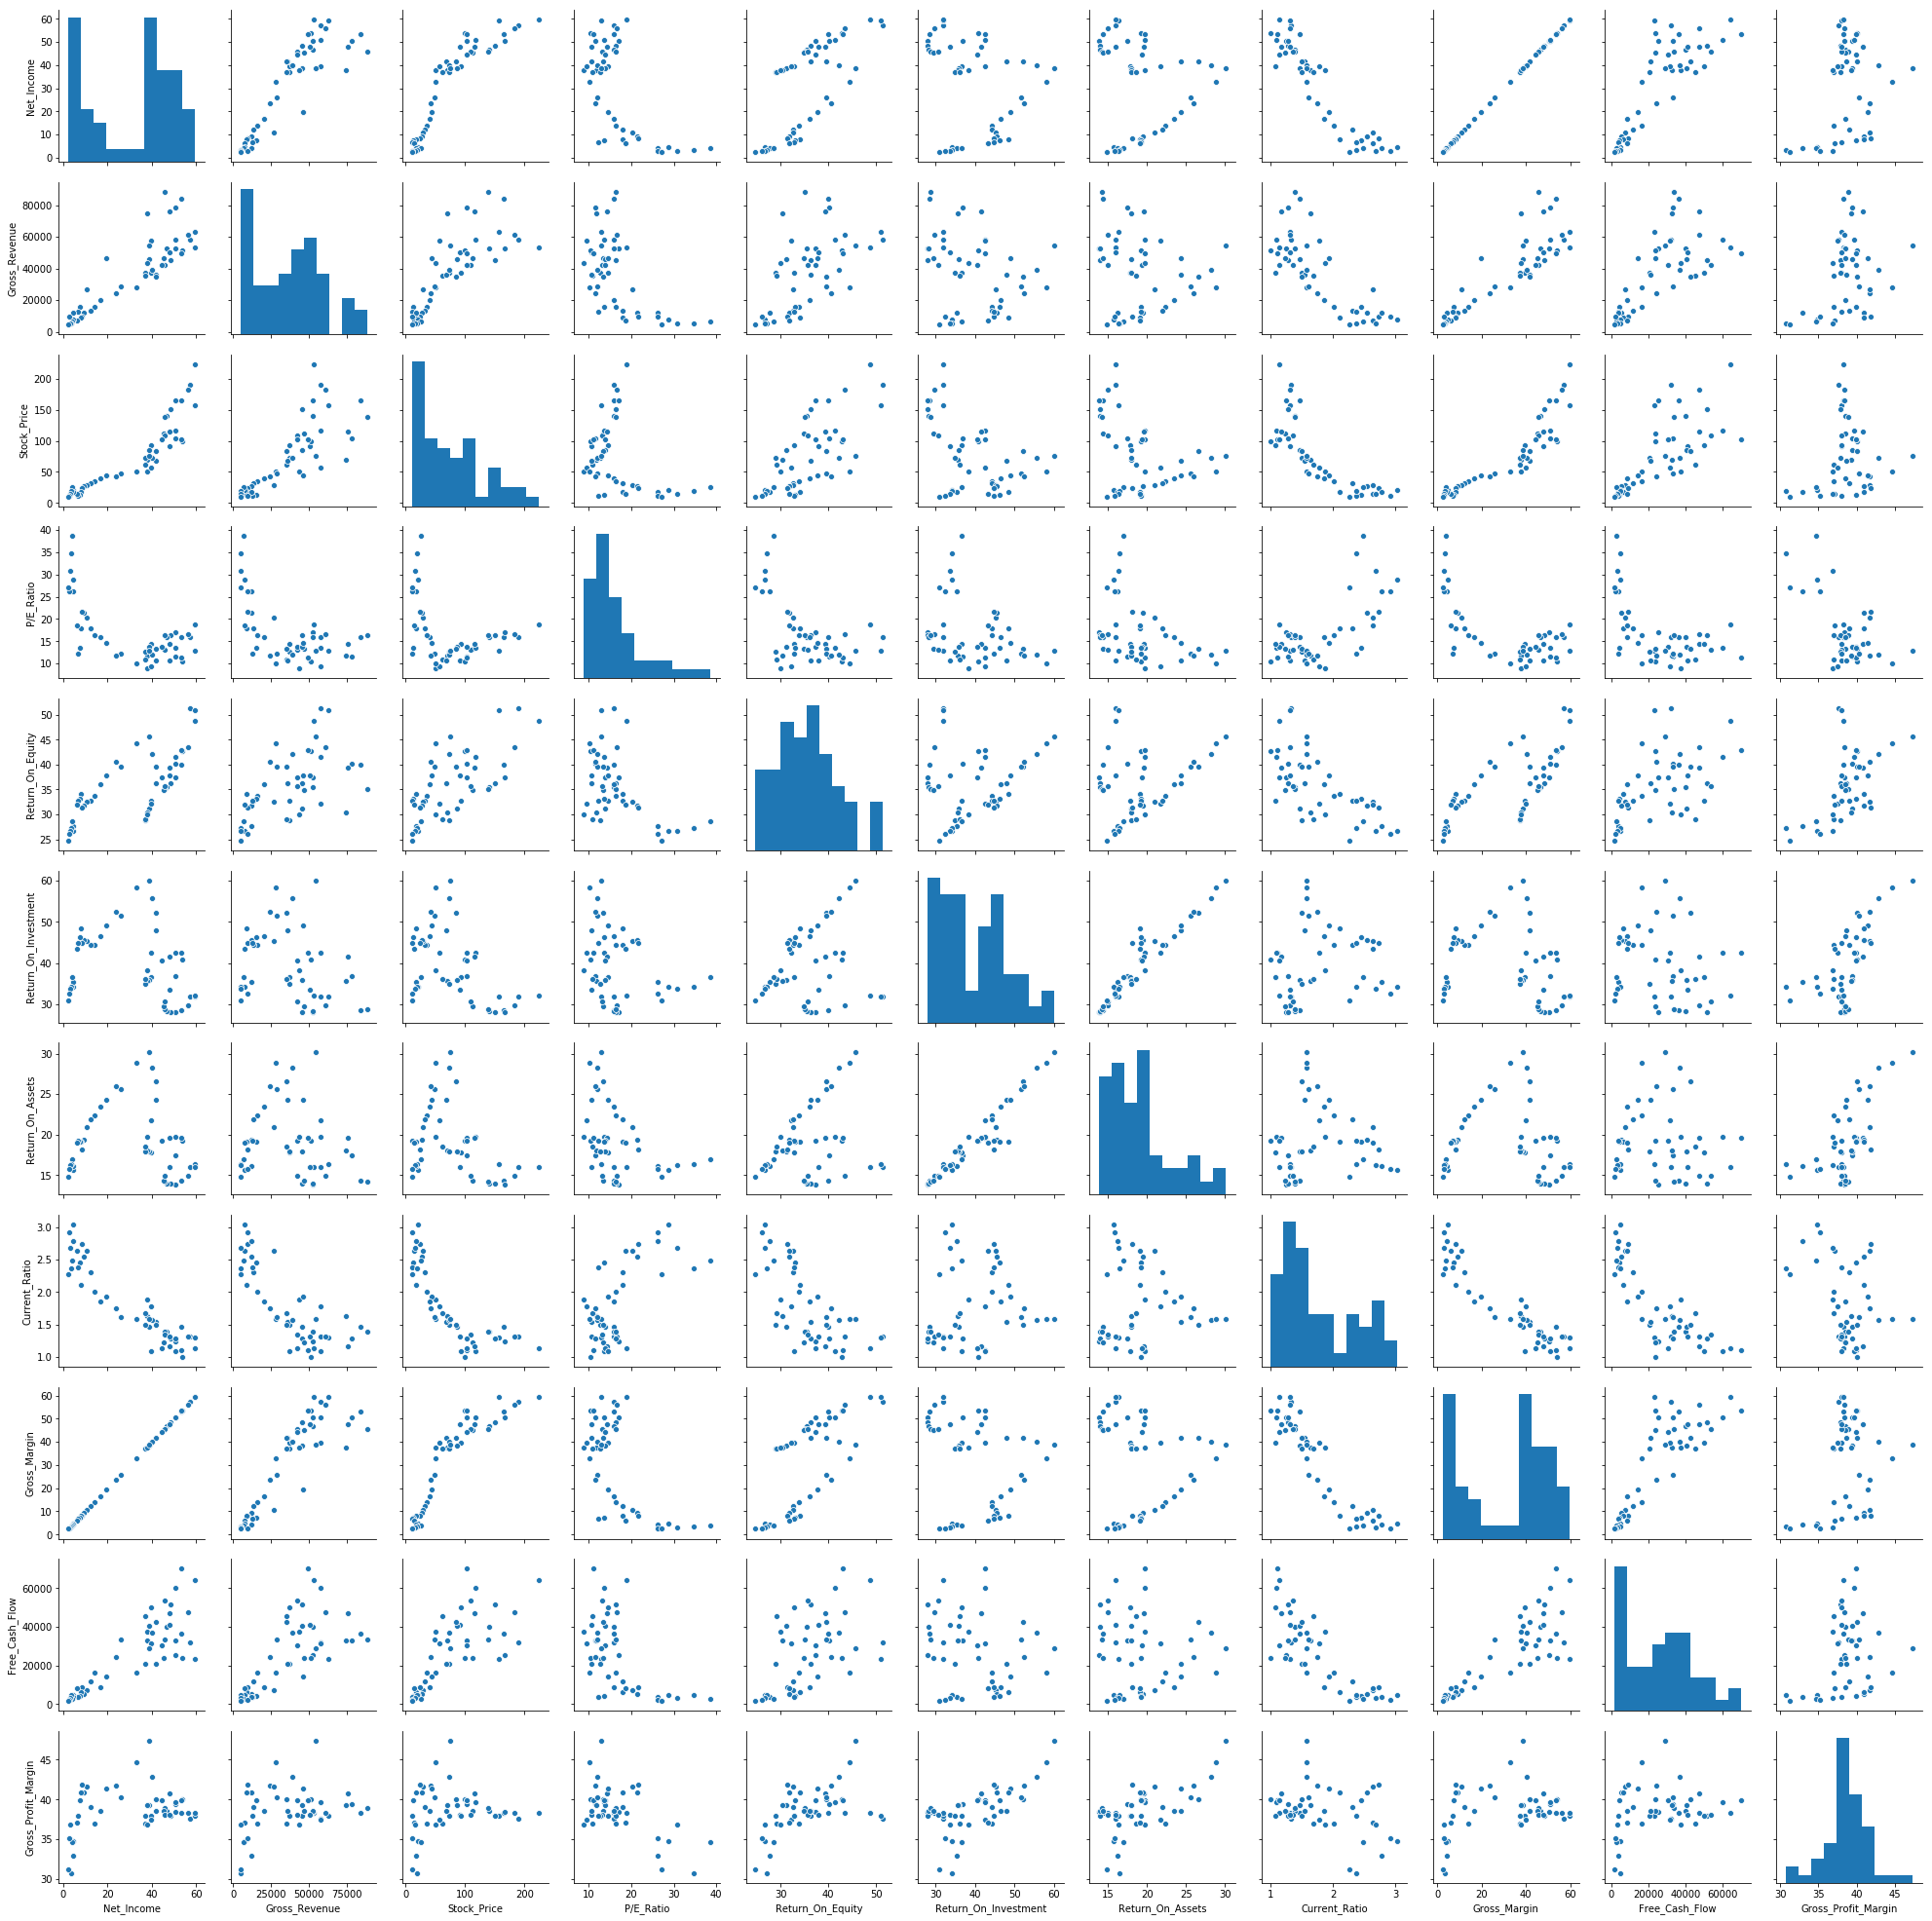

In [22]:
#pairplot
sns.pairplot(stock_features)

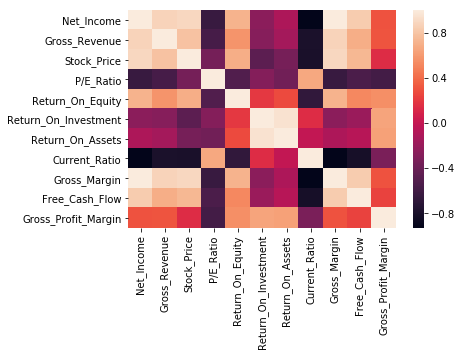

In [23]:
#plotting correlation heatmap
corr = stock_features.corr()
sns.heatmap(corr)

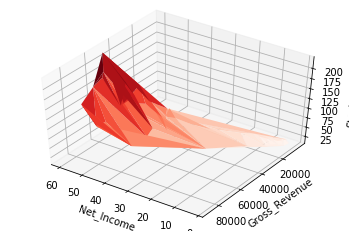

In [24]:
#plotting multiple variables
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(stock_features['Net_Income'], stock_features['Gross_Revenue'], stock_features['Stock_Price'], cmap=plt.cm.Reds, linewidth=0.2)
ax.view_init(45, 125)
ax.set_xlabel('Net_Income')
ax.set_ylabel('Gross_Revenue')
ax.set_zlabel('Stock_Price')
plt.show()

#CONCLUSION: as net income and gross-revenue go up, stock price goes up
#            as net income goes up gross revenue goes up also

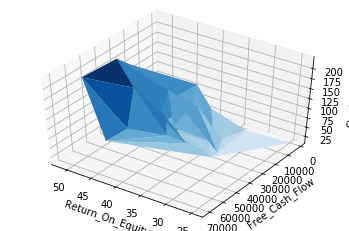

In [25]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(stock_features['Return_On_Equity'], stock_features['Free_Cash_Flow'], stock_features['Stock_Price'], cmap=plt.cm.Blues, linewidth=0.2)
ax.view_init(45, 125)
ax.set_xlabel('Return_On_Equity')
ax.set_ylabel('Free_Cash_Flow')
ax.set_zlabel('Stock_Price')
plt.show()

#CONCLUSION: as roe and free cash flow go up, stock price goes up
#            as roe goes up free cash flow goes up also

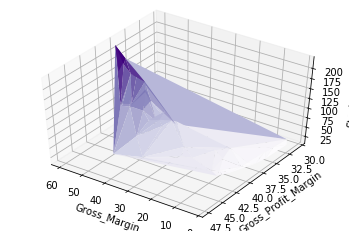

In [26]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(stock_features['Gross_Margin'], stock_features['Gross_Profit_Margin'], stock_features['Stock_Price'], cmap=plt.cm.Purples, linewidth=0.2)
ax.view_init(45, 125)
ax.set_xlabel('Gross_Margin')
ax.set_ylabel('Gross_Profit_Margin')
ax.set_zlabel('Stock_Price')
plt.show()

#CONCLUSION: as gross margin and gross-profit-margin go up, stock price goes up
#            as gross margin goes up gross-profit-margin goes up also

In [27]:
#time series data 
date = pd.to_datetime(stock_features['Date'])
date = pd.DataFrame(date)
date.columns = ['date']

In [28]:
stock_features = pd.concat([stock_features, date], axis=1)
stock_features

,Date,Net_Income,Gross_Revenue,Stock_Price,P/E_Ratio,Return_On_Equity,Return_On_Investment,Return_On_Assets,Current_Ratio,Gross_Margin,Free_Cash_Flow,Gross_Profit_Margin,date
0,"March 31, 2019",57.170,58015.0,189.95,15.98,51.29,31.95,15.98,1.32,57.170,32127.0,37.61,2019-03-31
1,"Dec. 31, 2018",59.430,62900.0,157.07,12.92,50.92,31.91,16.33,1.30,59.430,23335.0,37.99,2018-12-31
2,"Sept. 30, 2018",59.530,53265.0,223.99,18.87,48.68,32.03,15.99,1.13,59.530,64121.0,38.29,2018-09-30
3,"June 30, 2018",56.120,61137.0,183.03,16.59,43.50,29.66,14.98,1.31,56.120,47639.0,38.34,2018-06-30
4,"March 31, 2018",53.320,84310.0,165.26,15.95,39.97,28.54,14.27,1.46,53.320,36418.0,38.31,2018-03-31
5,"Dec. 31, 2017",50.520,52579.0,166.02,17.06,37.37,28.05,13.83,1.24,50.520,25483.0,38.41,2017-12-31
6,"Sept. 30, 2017",48.350,45408.0,150.65,16.38,36.29,27.94,13.95,1.28,48.350,51774.0,37.91,2017-09-30
7,"June 30, 2017",46.650,52896.0,140.21,15.93,35.40,28.21,14.00,1.39,46.650,39890.0,38.51,2017-06-30
8,"March 31, 2017",45.730,88293.0,139.29,16.29,35.09,28.81,14.15,1.39,45.730,33495.0,38.93,2017-03-31
9,"Dec. 31, 2016",45.220,46852.0,111.82,13.39,34.94,29.42,14.31,1.23,45.220,23900.0,38.51,2016-12-31


In [29]:
stock_features = stock_features.drop(columns = ['Date'])
stock_features['Gross_Revenue'] = stock_features['Gross_Revenue']/1000
stock_features.columns = ['Net_Income','Gross_Revenue','Stock_Price', 'PE_Ratio','Return_On_Equity','Return_On_Investment','Return_On_Assets','Current_Ratio','Gross_Margin','Free_Cash_Flow','Gross_Profit_Margin','date']
stock_features


,Net_Income,Gross_Revenue,Stock_Price,PE_Ratio,Return_On_Equity,Return_On_Investment,Return_On_Assets,Current_Ratio,Gross_Margin,Free_Cash_Flow,Gross_Profit_Margin,date
0,57.170,58.015,189.95,15.98,51.29,31.95,15.98,1.32,57.170,32127.0,37.61,2019-03-31
1,59.430,62.900,157.07,12.92,50.92,31.91,16.33,1.30,59.430,23335.0,37.99,2018-12-31
2,59.530,53.265,223.99,18.87,48.68,32.03,15.99,1.13,59.530,64121.0,38.29,2018-09-30
3,56.120,61.137,183.03,16.59,43.50,29.66,14.98,1.31,56.120,47639.0,38.34,2018-06-30
4,53.320,84.310,165.26,15.95,39.97,28.54,14.27,1.46,53.320,36418.0,38.31,2018-03-31
5,50.520,52.579,166.02,17.06,37.37,28.05,13.83,1.24,50.520,25483.0,38.41,2017-12-31
6,48.350,45.408,150.65,16.38,36.29,27.94,13.95,1.28,48.350,51774.0,37.91,2017-09-30
7,46.650,52.896,140.21,15.93,35.40,28.21,14.00,1.39,46.650,39890.0,38.51,2017-06-30
8,45.730,88.293,139.29,16.29,35.09,28.81,14.15,1.39,45.730,33495.0,38.93,2017-03-31
9,45.220,46.852,111.82,13.39,34.94,29.42,14.31,1.23,45.220,23900.0,38.51,2016-12-31


In [30]:
cols = stock_features.columns.tolist()
cols = cols[-1:] + cols[:-1]
stock_features = stock_features[cols]

Text(0, 0.5, 'Gross Revenue')

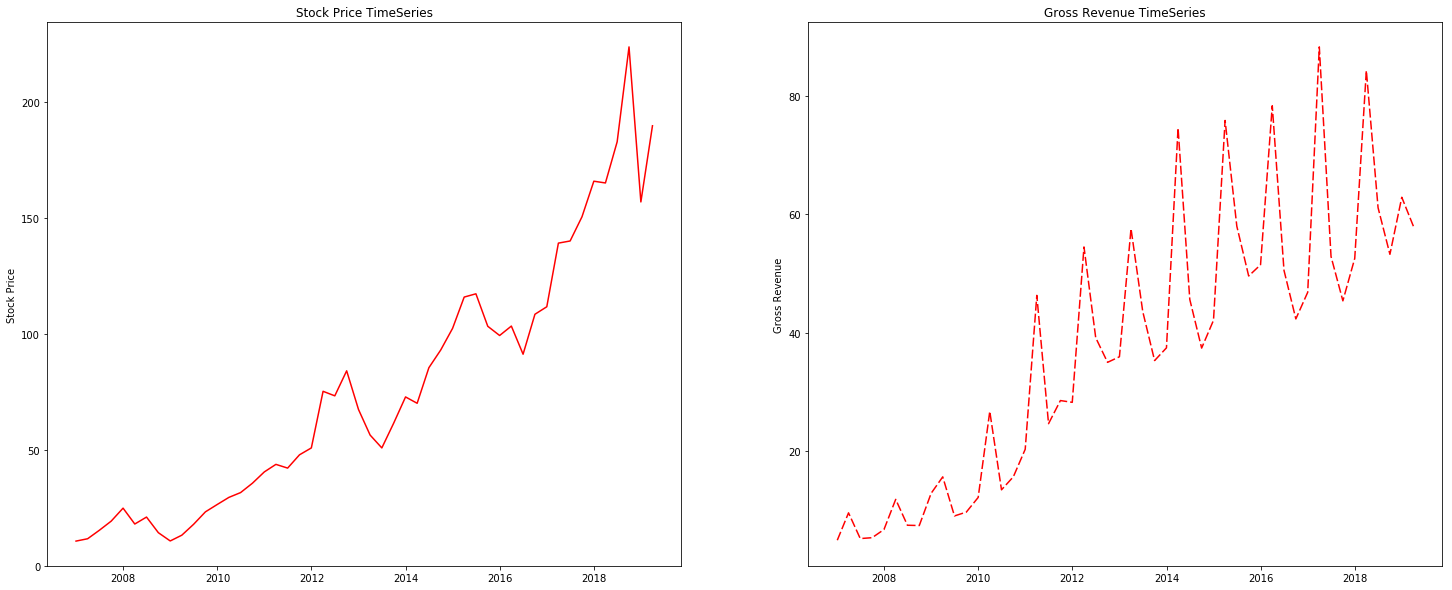

In [31]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.plot(stock_features.date, stock_features.Stock_Price, color="Red")
plt.title("Stock Price TimeSeries")
plt.ylabel("Stock Price")


ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.plot(stock_features.date, stock_features.Gross_Revenue, dashes=[6, 2], color="Red")
plt.title("Gross Revenue TimeSeries")
plt.ylabel("Gross Revenue")

Text(0, 0.5, 'Net Income')

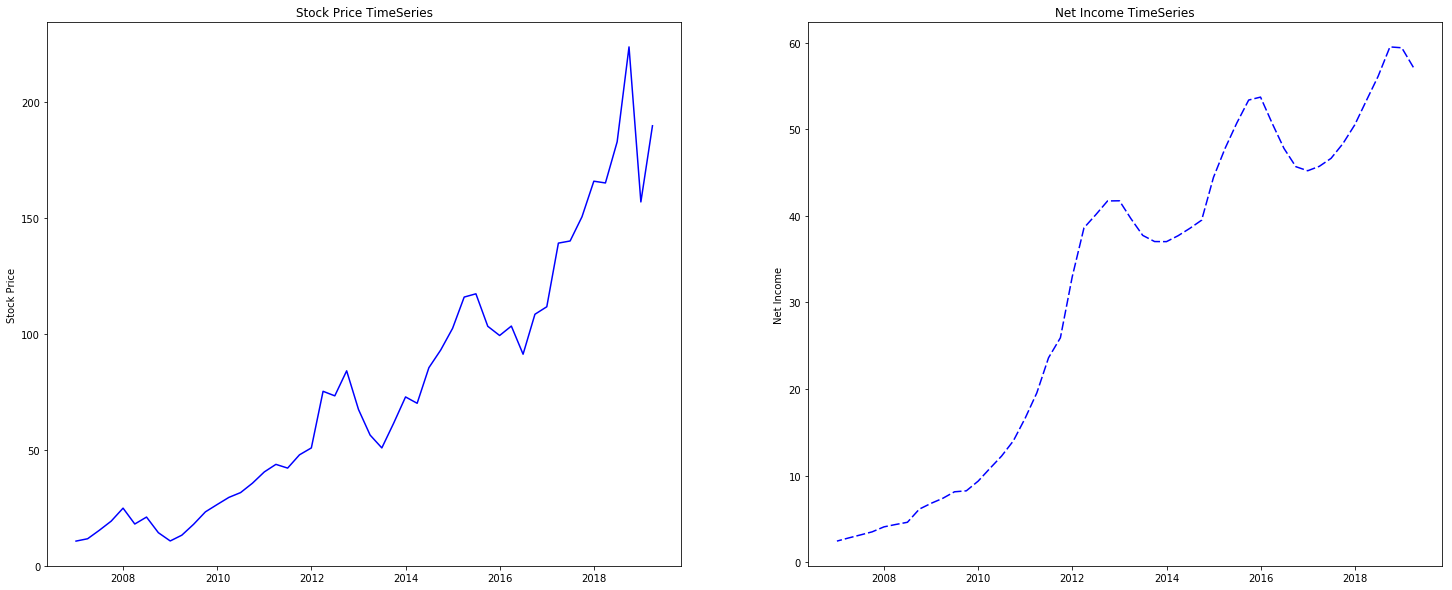

In [32]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.plot(stock_features.date, stock_features.Stock_Price, color="Blue")
plt.title("Stock Price TimeSeries")
plt.ylabel("Stock Price")


ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.plot(stock_features.date, stock_features.Net_Income, dashes=[6, 2], color="Blue")
plt.title("Net Income TimeSeries")
plt.ylabel("Net Income")

Text(0, 0.5, 'PE Ratio')

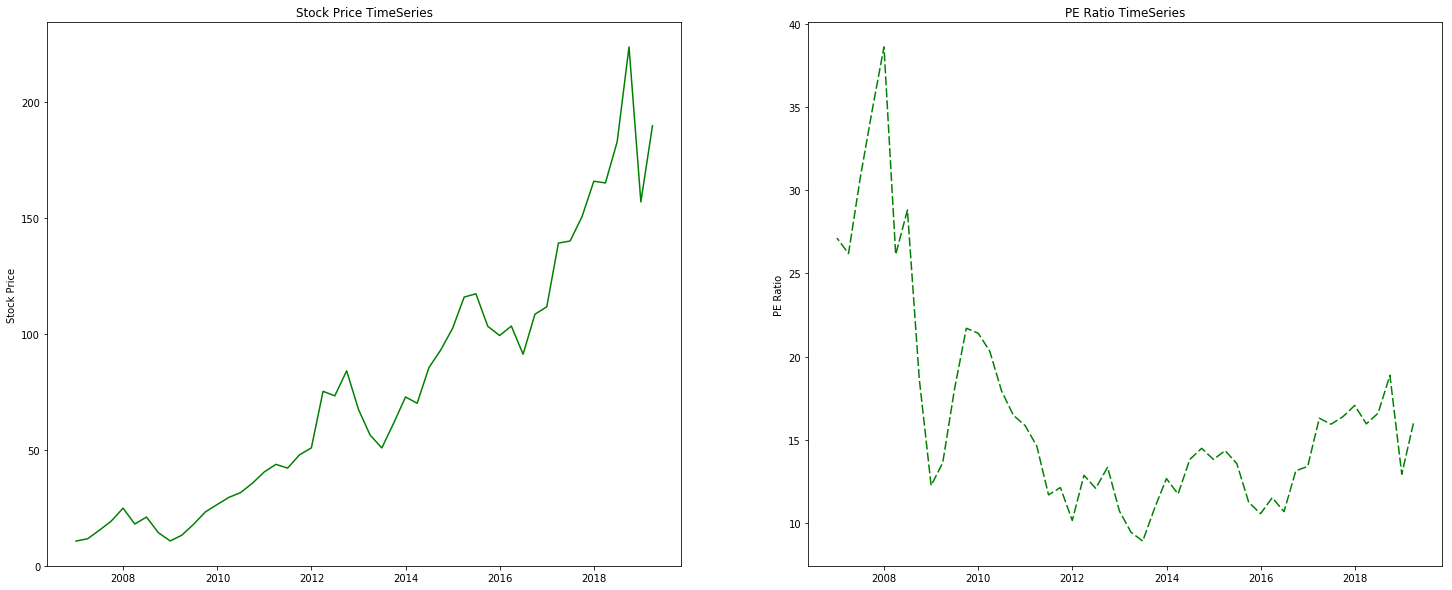

In [33]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.plot(stock_features.date, stock_features.Stock_Price, color="Green")
plt.title("Stock Price TimeSeries")
plt.ylabel("Stock Price")


ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.plot(stock_features.date, stock_features.PE_Ratio, dashes=[6, 2], color="Green")
plt.title("PE Ratio TimeSeries")
plt.ylabel("PE Ratio")

Text(0, 0.5, 'Free Cash Flow')

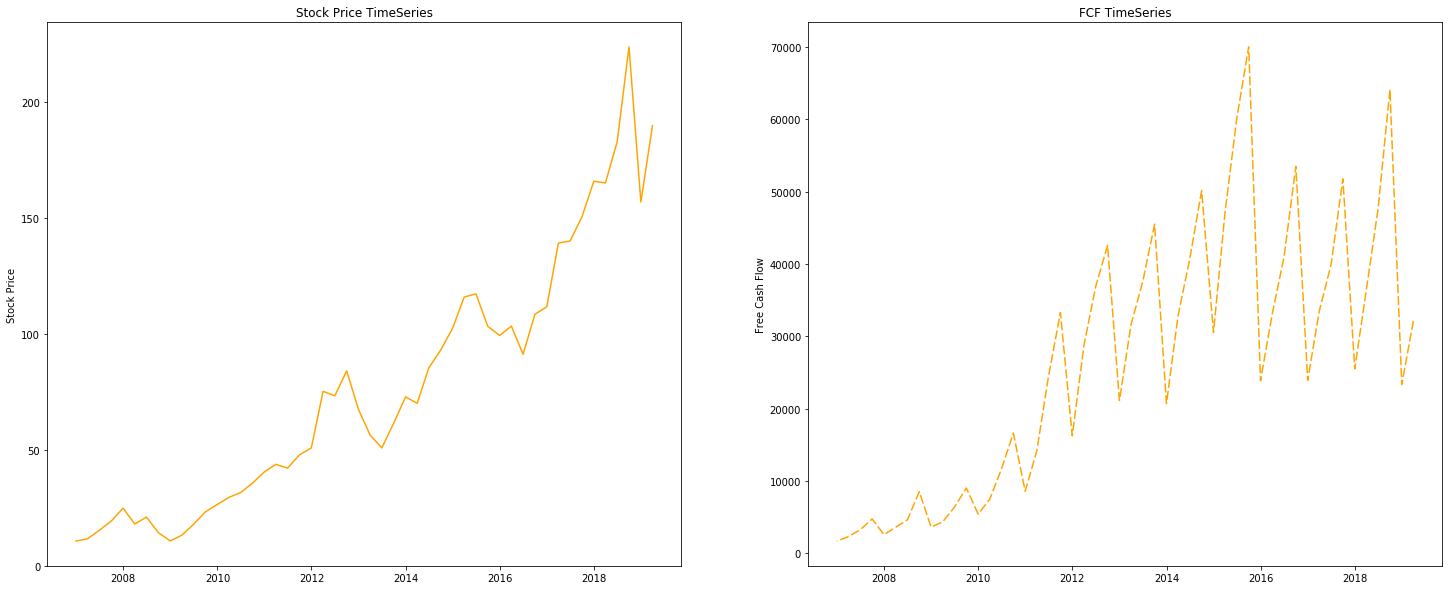

In [34]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.plot(stock_features.date, stock_features.Stock_Price, color="Orange")
plt.title("Stock Price TimeSeries")
plt.ylabel("Stock Price")


ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.plot(stock_features.date, stock_features.Free_Cash_Flow, dashes=[6, 2], color="Orange")
plt.title("FCF TimeSeries")
plt.ylabel("Free Cash Flow")

Text(0, 0.5, 'Return on Investment')

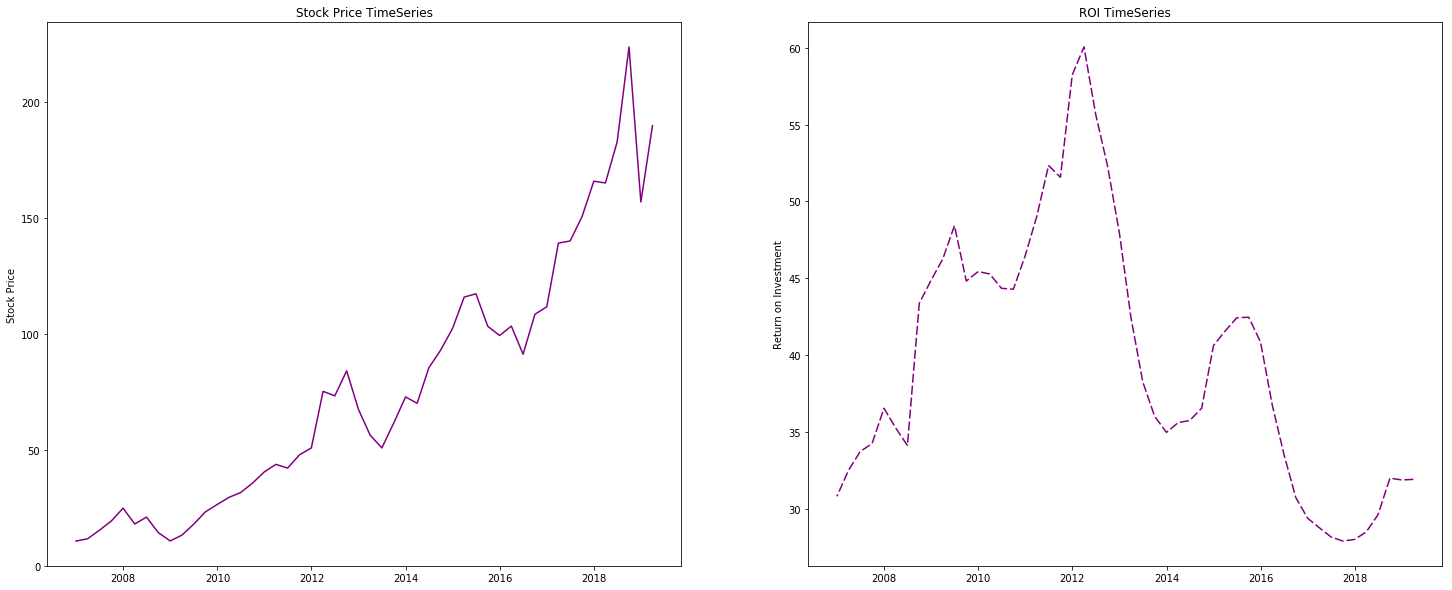

In [35]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.plot(stock_features.date, stock_features.Stock_Price, color="Purple")
plt.title("Stock Price TimeSeries")
plt.ylabel("Stock Price")


ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.plot(stock_features.date, stock_features.Return_On_Investment, dashes=[6, 2], color="Purple")
plt.title("ROI TimeSeries")
plt.ylabel("Return on Investment")

Text(0, 0.5, 'Return on Equity')

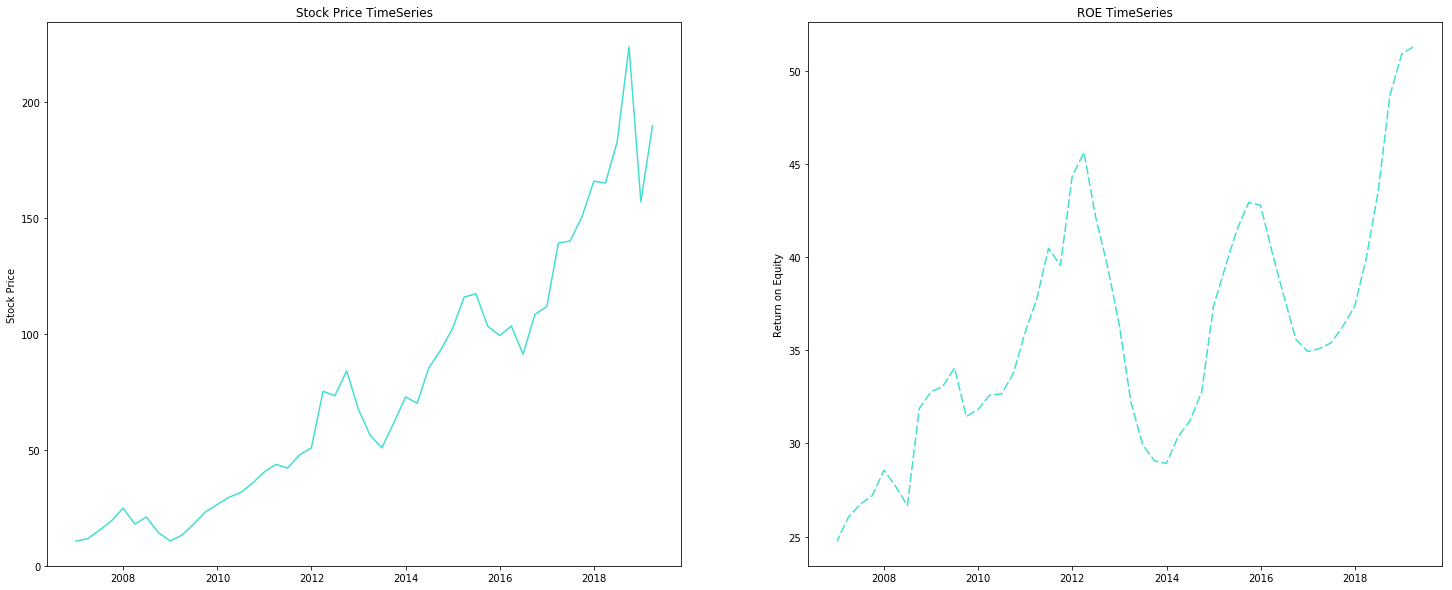

In [36]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.plot(stock_features.date, stock_features.Stock_Price, color="Turquoise")
plt.title("Stock Price TimeSeries")
plt.ylabel("Stock Price")


ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.plot(stock_features.date, stock_features.Return_On_Equity, dashes=[6, 2], color="Turquoise")
plt.title("ROE TimeSeries")
plt.ylabel("Return on Equity")

Text(0, 0.5, 'Return on Assets')

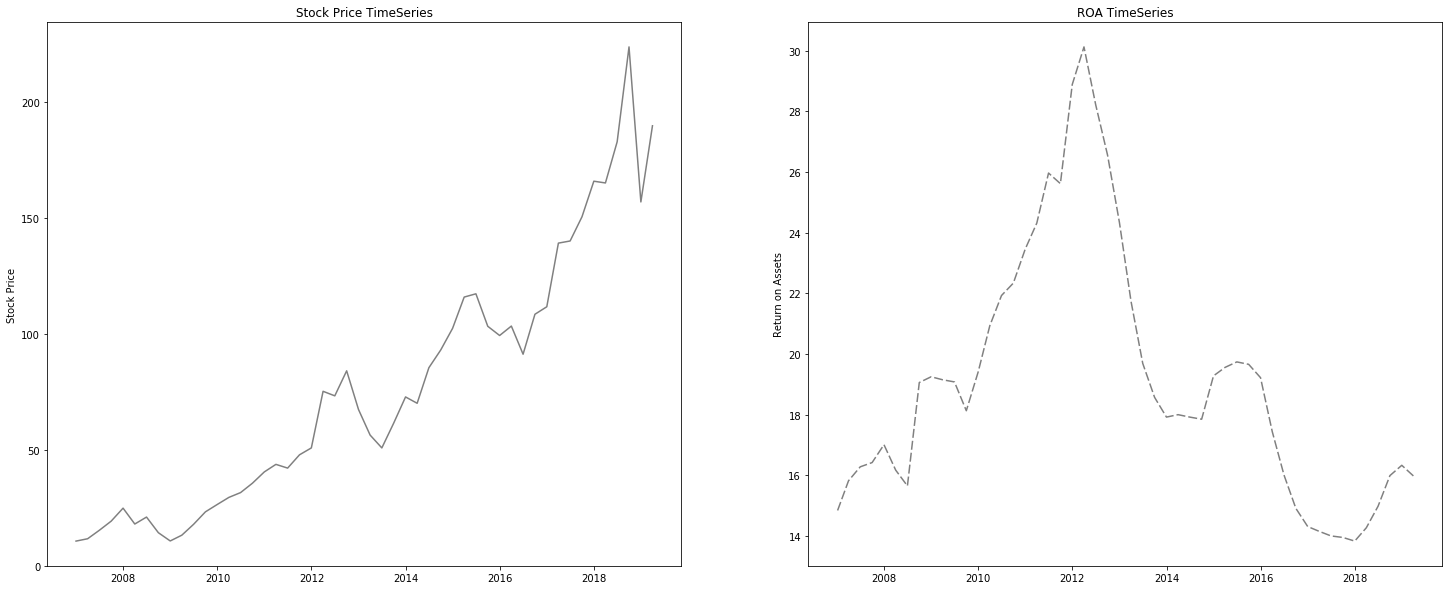

In [37]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.plot(stock_features.date, stock_features.Stock_Price, color="Grey")
plt.title("Stock Price TimeSeries")
plt.ylabel("Stock Price")


ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.plot(stock_features.date, stock_features.Return_On_Assets, dashes=[6, 2], color="Grey")
plt.title("ROA TimeSeries")
plt.ylabel("Return on Assets")

Text(0, 0.5, 'Gross Profit Margin')

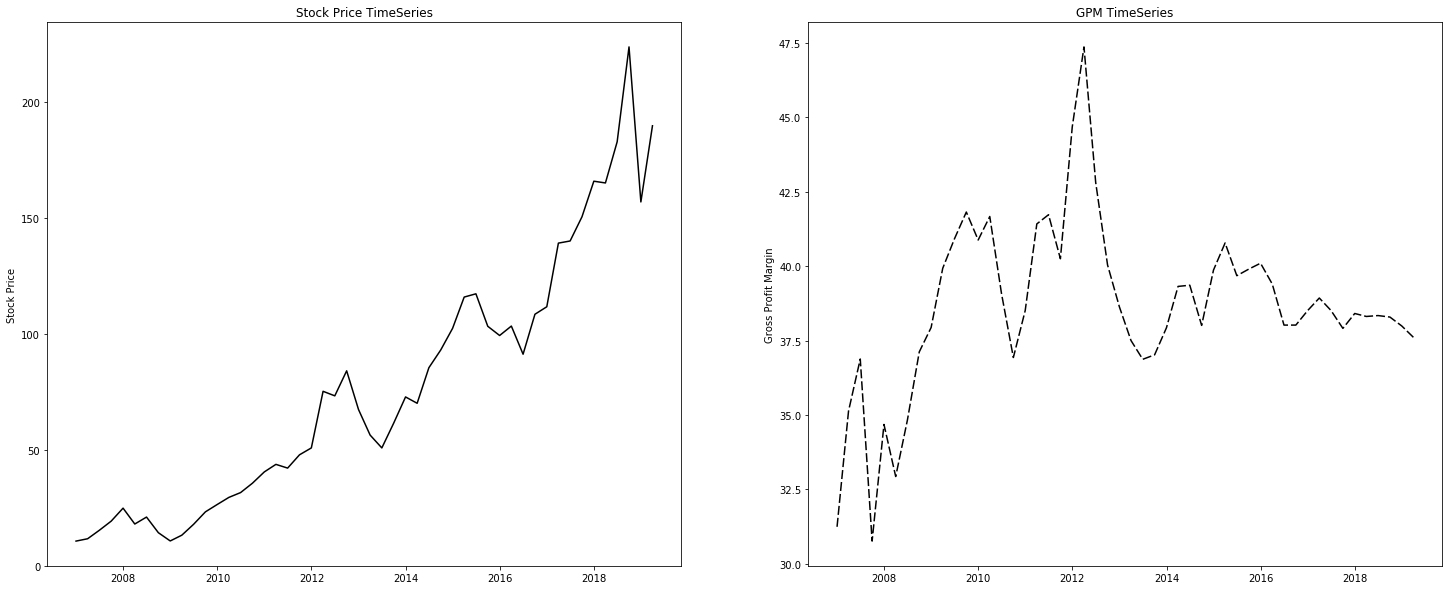

In [38]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.plot(stock_features.date, stock_features.Stock_Price, color="Black")
plt.title("Stock Price TimeSeries")
plt.ylabel("Stock Price")


ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.plot(stock_features.date, stock_features.Gross_Profit_Margin, dashes=[6, 2], color="Black")
plt.title("GPM TimeSeries")
plt.ylabel("Gross Profit Margin")

DOING REGRESSION ANALYSIS

In [39]:
#simple linear regression
import sklearn
from sklearn.model_selection import train_test_split

In [40]:
stock_features_copy = stock_features.copy()
stock_features_copy = stock_features_copy.drop(columns=['date'])
X = stock_features_copy.drop(columns=['Stock_Price'])
Y = stock_features_copy['Stock_Price']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [42]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [43]:
predictions = lm.predict(X_test)
predictions

array([ 85.25914424,  62.73316249,  -1.59770476, 133.15439709,
        22.30119385, 138.9366263 ,  55.20064407, 118.58114452,
        41.33699428, 122.01253905])

In [44]:
lm.score(X_test,y_test)

0.8610785688475642

In [45]:
#trying ridge regression
from sklearn.linear_model import Ridge

In [46]:
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [47]:
predictions_1 = clf.predict(X_test)
predictions_1

array([ 84.97633146,  62.66403384,  -1.48892354, 133.04196595,
        22.79758396, 139.15859167,  55.73212909, 118.45176949,
        40.95338976, 121.96937557])

In [48]:
clf.score(X_test,y_test)

0.8600459981021081

In [49]:
#trying lasso regression
from sklearn import linear_model

In [50]:
clf_2 = linear_model.Lasso(alpha=1.0)
clf_2.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
predictions_2 = clf_2.predict(X_test)
predictions_2

array([ 83.27436966,  62.55060432,  -0.24077511, 132.06323021,
        23.28910175, 139.77517141,  57.69309459, 118.57904335,
        40.66532929, 121.88200518])

In [52]:
clf_2.score(X_test,y_test)

0.8584002816173754

In [53]:
#trying elasticnet regression
from sklearn.linear_model import ElasticNet

In [54]:
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train) 

/Users/saiteja_suvarna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [55]:
predictions_3 = regr.predict(X_test)
predictions_3

array([ 81.88930847,  63.26169312,   0.22701005, 131.5492025 ,
        23.36372048, 140.40620736,  58.66752156, 119.08267866,
        39.43078019, 123.17525272])

In [56]:
regr.score(X_test, y_test)

0.8523025463786371

In [57]:
#comparing forecasted data to actual data
lin_reg_preds = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
lin_reg_preds

,Actual,Predicted
28,75.32,85.259144
21,72.89,62.733162
41,10.72,-1.597705
7,140.21,133.154397
43,21.03,22.301194
14,103.39,138.936626
23,50.88,55.200644
16,116.00,118.581145
32,43.78,41.336994
13,99.41,122.012539


In [58]:
ridge_reg_preds = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_1})  
ridge_reg_preds

,Actual,Predicted
28,75.32,84.976331
21,72.89,62.664034
41,10.72,-1.488924
7,140.21,133.041966
43,21.03,22.797584
14,103.39,139.158592
23,50.88,55.732129
16,116.00,118.451769
32,43.78,40.953390
13,99.41,121.969376


In [59]:
lasso_reg_preds = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_2})  
lasso_reg_preds

,Actual,Predicted
28,75.32,83.274370
21,72.89,62.550604
41,10.72,-0.240775
7,140.21,132.063230
43,21.03,23.289102
14,103.39,139.775171
23,50.88,57.693095
16,116.00,118.579043
32,43.78,40.665329
13,99.41,121.882005


In [97]:
elasticnet_reg_preds = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_3})  
elasticnet_reg_preds = elasticnet_reg_preds.reset_index()
elasticnet_reg_preds

,index,Actual,Predicted
0,28,75.32,81.889308
1,21,72.89,63.261693
2,41,10.72,0.227010
3,7,140.21,131.549203
4,43,21.03,23.363720
5,14,103.39,140.406207
6,23,50.88,58.667522
7,16,116.00,119.082679
8,32,43.78,39.430780
9,13,99.41,123.175253


In [103]:
simple_list = []
stock_features['date'].iloc[28]
stock_features['date'].iloc[21]
stock_features['date'].iloc[41]
stock_features['date'].iloc[7]
stock_features['date'].iloc[43]
stock_features['date'].iloc[14]
stock_features['date'].iloc[23]
stock_features['date'].iloc[16]
stock_features['date'].iloc[32]
stock_features['date'].iloc[13]

simple_list.append(stock_features['date'].iloc[28])
simple_list.append(stock_features['date'].iloc[21])
simple_list.append(stock_features['date'].iloc[41])
simple_list.append(stock_features['date'].iloc[7])
simple_list.append(stock_features['date'].iloc[43])
simple_list.append(stock_features['date'].iloc[14])
simple_list.append(stock_features['date'].iloc[23])
simple_list.append(stock_features['date'].iloc[16])
simple_list.append(stock_features['date'].iloc[32])
simple_list.append(stock_features['date'].iloc[13])

simple_list = pd.Series(simple_list) 
simple_list

fin_actual_predicted = pd.concat([simple_list, elasticnet_reg_preds], axis=1)
fin_actual_predicted = fin_actual_predicted.drop(columns=['index'])
fin_actual_predicted.columns = ['date', 'Actual','Predicted']
fin_actual_predicted

,date,Actual,Predicted
0,2012-03-31,75.32,81.889308
1,2013-12-31,72.89,63.261693
2,2008-12-31,10.72,0.227010
3,2017-06-30,140.21,131.549203
4,2008-06-30,21.03,23.363720
5,2015-09-30,103.39,140.406207
6,2013-06-30,50.88,58.667522
7,2015-03-31,116.00,119.082679
8,2011-03-31,43.78,39.430780
9,2015-12-31,99.41,123.175253


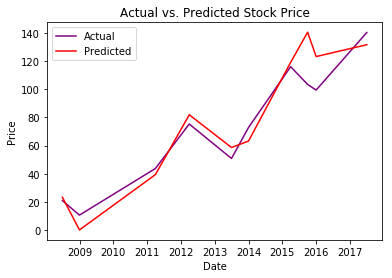

In [119]:
#Graphing actual vs predicted stock price
ax = sns.lineplot(x='date',y='Actual',data=fin_actual_predicted, color='purple')
ax = sns.lineplot(x='date',y='Predicted',data=fin_actual_predicted, color='red')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Actual vs. Predicted Stock Price")
plt.legend(labels=['Actual','Predicted'])